<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
#Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1" 
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  # For CPU inference

In [2]:
 # dynamically grow the memory used on the GPU
from tensorflow.compat.v1.keras.backend import set_session
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True 
sess = tf.compat.v1.Session(config=config)
set_session(sess)

In [3]:
# Import all necessary libraries.
import numpy as np
import sys
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

plt.rcParams["figure.figsize"] = (20,10)

# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')

# specify the path to Mask_RCNN if you placed it outside Nomeroff-net project
CRAFT_DIR = os.path.join(NOMEROFF_NET_DIR, 'CRAFT-pytorch')

sys.path.append(NOMEROFF_NET_DIR)
sys.path.append(CRAFT_DIR)

In [4]:
from NomeroffNet.MmdetectionDetector import Detector

detector = Detector()
detector.loadModel(cfg_path = '../models/faster_rcnn_r50_caffe_fpn_mstrain_1x_numberpale.py',
                 checkpoint_file = '../models//epoch_12.pth',
                 devie='cuda:0')

Use load_from_local loader


In [5]:
from NomeroffNet.BBoxNpPoints import NpPointsCraft

npPointsCraft = NpPointsCraft()
npPointsCraft.load()

Loading weights from checkpoint (/mnt/ssd/www/nomeroff-netv2/nomeroff-net/weights/craft_mlt_25k.pth)
Loading weights of refiner from checkpoint (/mnt/ssd/www/nomeroff-netv2/nomeroff-net/weights/craft_refiner_CTW1500.pth)


In [6]:
from NomeroffNet.OptionsDetector import OptionsDetector
from NomeroffNet.TextDetector import TextDetector

# Import license plate recognition tools.
from NomeroffNet.RectDetector import  RectDetector

rectDetector = RectDetector()

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector({
    "eu_ua_2004_2015": {
        "for_regions": ["eu_ua_2015", "eu_ua_2004"],
        "model_path": "latest"
    },
    "eu_ua_1995": {
        "for_regions": ["eu_ua_1995"],
        "model_path": "latest"
    },
    "eu": {
        "for_regions": ["eu"],
        "model_path": "latest"
    },
    "ru": {
        "for_regions": ["ru", "eu-ua-fake-lnr", "eu-ua-fake-dnr"],
        "model_path": "latest" 
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": "latest"
    },
    "ge": {
        "for_regions": ["ge"],
        "model_path": "latest"
    },
    "su": {
        "for_regions": ["su"],
        "model_path": "latest"
    }
})

[[array([182.76566   , 334.2609    , 306.32687   , 368.3812    ,
         0.77372813], dtype=float32)]] (1, 1, 5)


/mnt/ssd/www/mmdetection/mmdet/datasets/utils.py:62: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


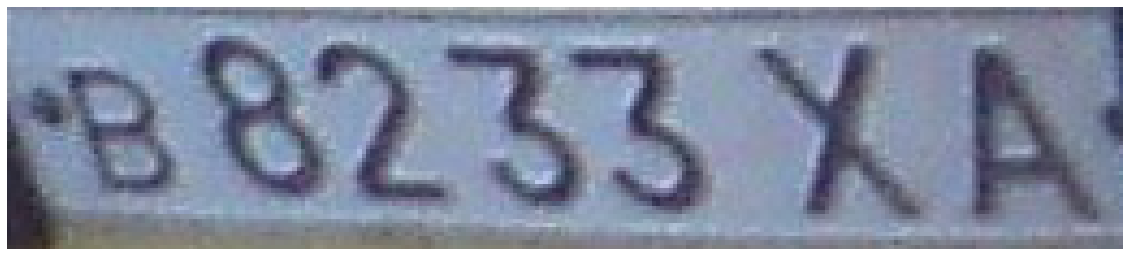

['su']
[1]
['В8233ХА']
[[357.         654.41843956]
 [576.89979538 663.77589659]
 [576.89979538 719.94610889]
 [357.         710.58865217]] (4, 2)


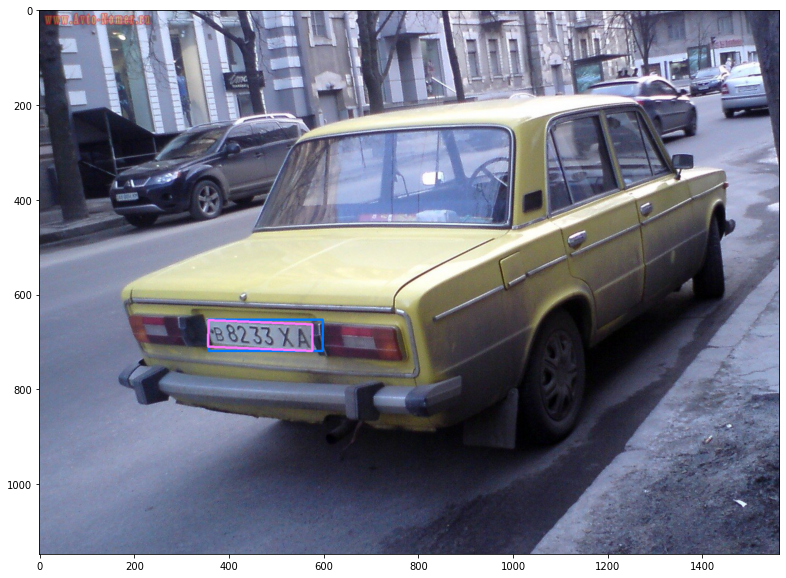

[[array([190.42021   , 407.00043   , 277.4452    , 451.96777   ,
         0.99738806], dtype=float32)]] (1, 1, 5)


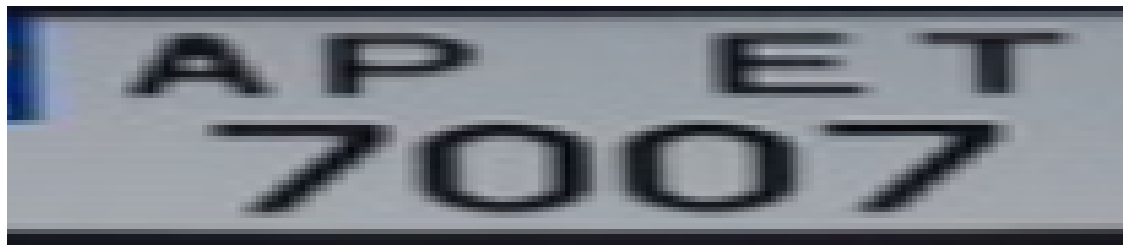

['kz']
[2]
['MC537O0']
[[203.54666599 408.59999573]
 [270.4266641  408.59999301]
 [270.4266641  453.39999788]
 [203.54666599 453.40000223]] (4, 2)


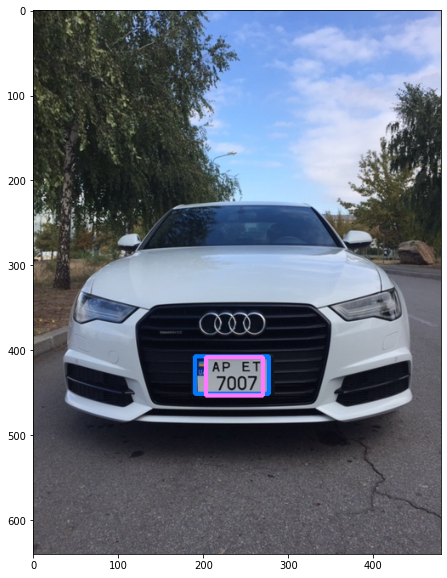

[[array([567.62823  , 298.67896  , 709.4688   , 375.27368  ,   0.9985879],
      dtype=float32)]] (1, 1, 5)


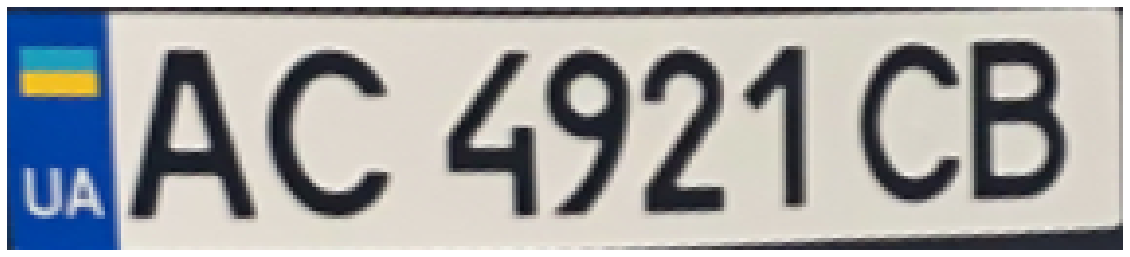

['eu_ua_2015']
[1]
['AC4921CB']
[[1085.13631325  462.65118525]
 [1085.13631325  524.69562471]
 [ 872.37207446  571.97656569]
 [ 872.37207446  509.93213203]] (4, 2)


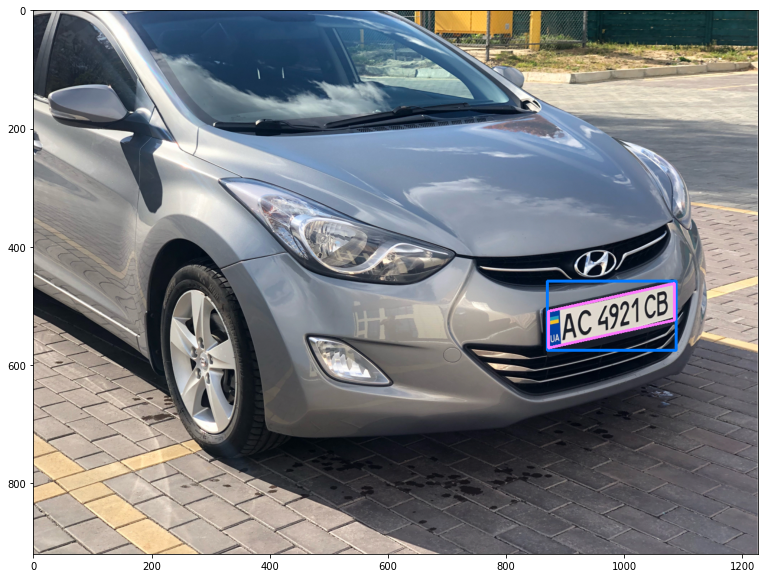

[[array([513.0262   , 367.92465  , 639.40643  , 397.45453  ,   0.9950192],
      dtype=float32), array([344.89166  , 319.4253   , 400.9454   , 361.52975  ,   0.5451717],
      dtype=float32)]] (1, 2, 5)


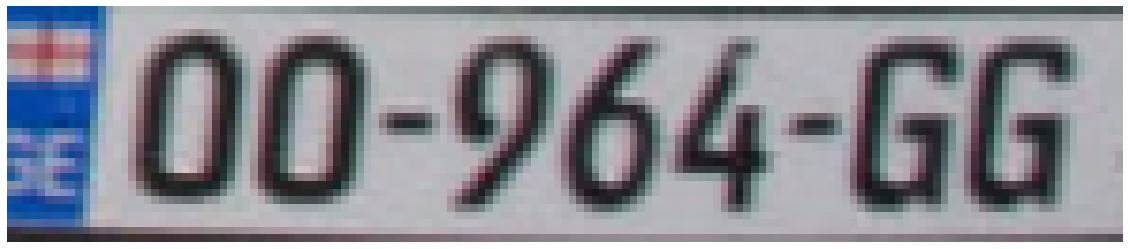

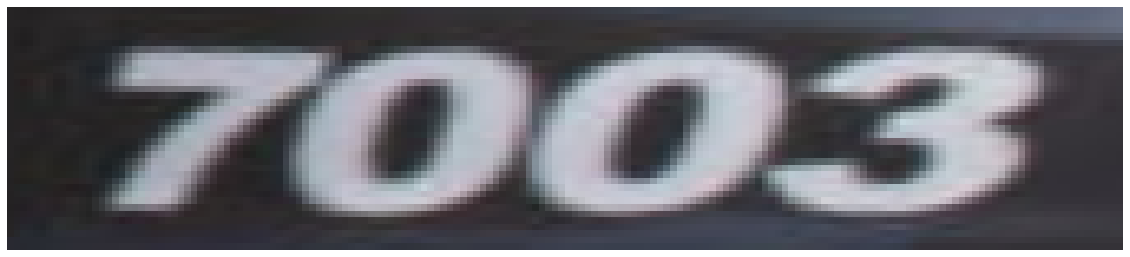

['ge', 'xx_unknown']
[1, 0]
['00964GG', '']
[[785.97331238 464.33333397]
 [785.97331238 496.33332634]
 [647.65333557 496.33332634]
 [647.65333557 464.33333397]] (4, 2)
[[431.         396.87879132]
 [500.98881528 415.96664665]
 [500.98881528 453.05754724]
 [431.         433.96969347]] (4, 2)


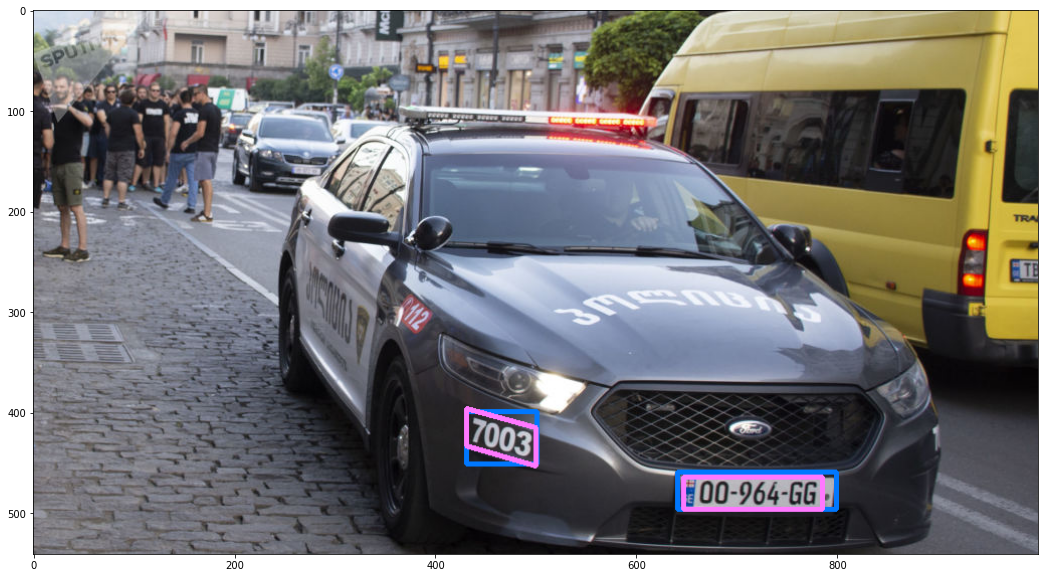

[[array([260.2512   , 226.81754  , 313.31357  , 240.03621  ,   0.9961273],
      dtype=float32), array([506.17862 , 226.32458 , 564.55505 , 240.52864 ,   0.995178],
      dtype=float32)]] (1, 2, 5)


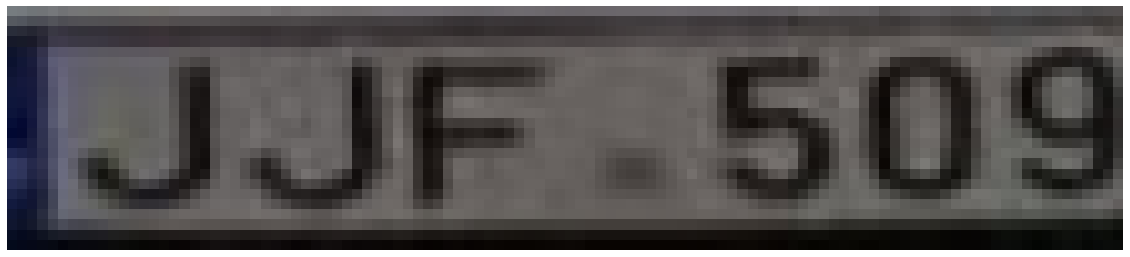

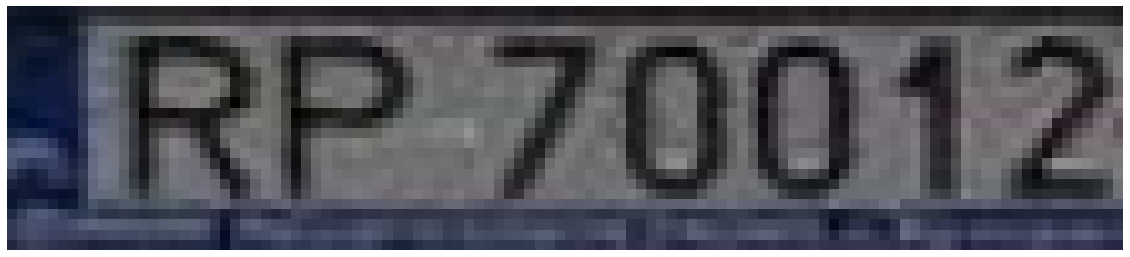

['eu', 'eu']
[1, 1]
['JJF509', 'RP70012']
[[435.         379.66666268]
 [522.         379.66665885]
 [522.         403.66666257]
 [435.         403.6666664 ]] (4, 2)
[[943.         381.        ]
 [943.         405.        ]
 [847.98666698 405.        ]
 [847.98666698 381.        ]] (4, 2)


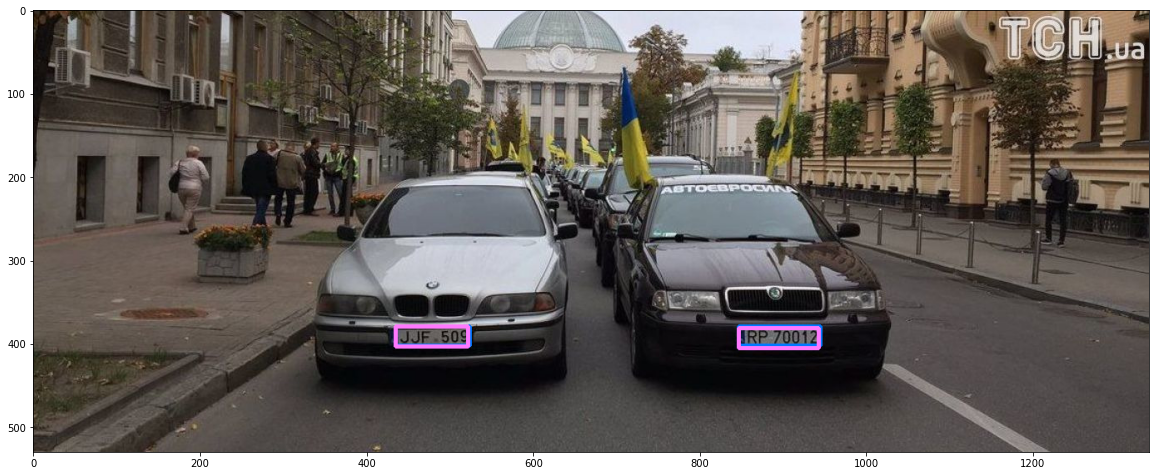

[[array([262.68372  , 564.18634  , 380.4433   , 656.0546   ,   0.9985759],
      dtype=float32)]] (1, 1, 5)


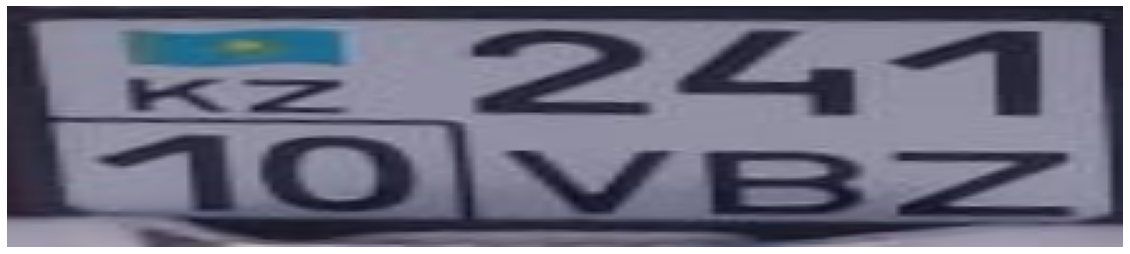

['kz']
[2]
['24110VB2']
[[283.         607.74480909]
 [409.         622.1447969 ]
 [409.         718.12141833]
 [283.         703.72142933]] (4, 2)


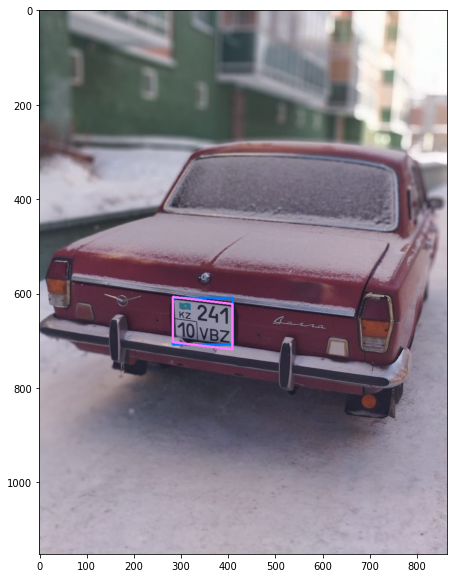

[[array([109.544205  , 259.1628    , 202.88312   , 346.00412   ,
         0.99886787], dtype=float32)]] (1, 1, 5)


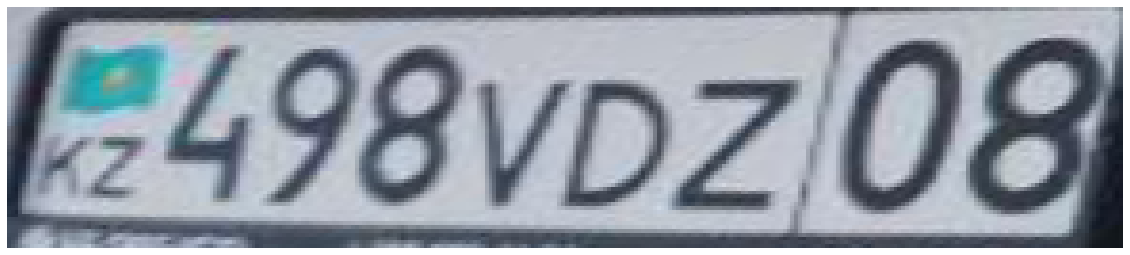

['kz']
[1]
['498VDZ08']
[[164.         384.36816547]
 [303.         454.90547308]
 [303.         518.5472584 ]
 [164.         448.00995217]] (4, 2)


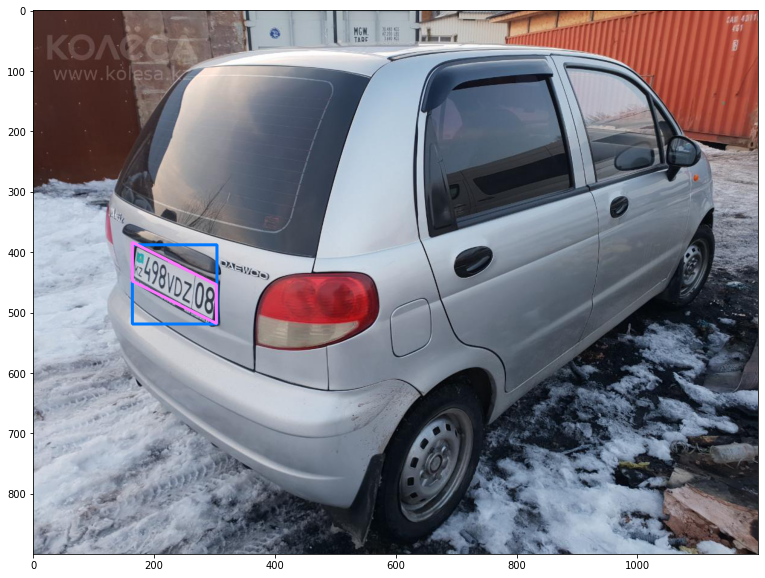

[[array([706.27167  , 380.07034  , 748.59045  , 441.67505  ,   0.9994461],
      dtype=float32)]] (1, 1, 5)


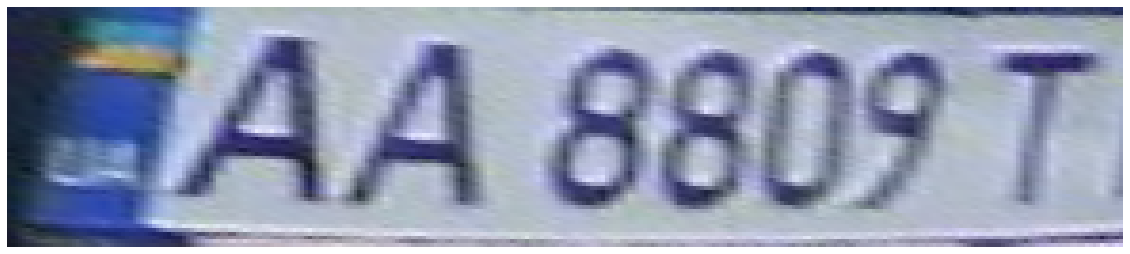

['eu_ua_2015']
[1]
['AA8809T']
[[1782.72881621  922.66253476]
 [1782.72881621  986.56841839]
 [1695.56544569 1058.35000587]
 [1695.56544569  994.44412487]] (4, 2)


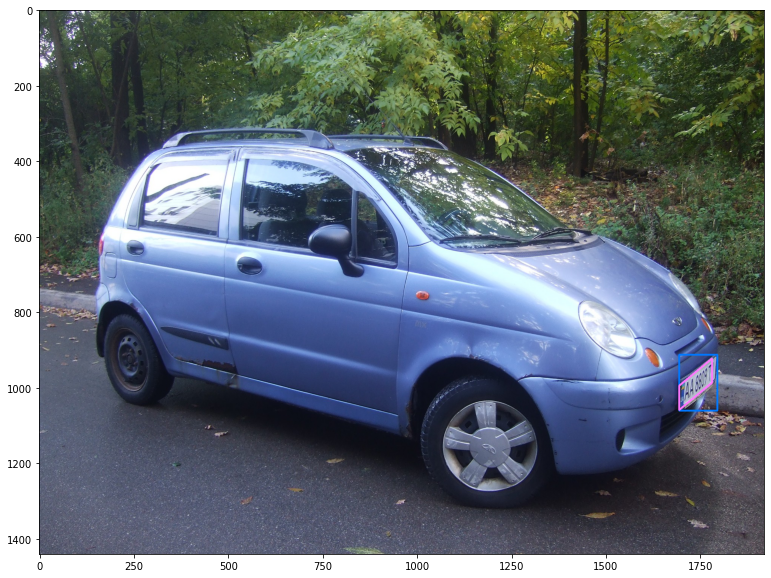

In [7]:
rootDir = 'images/*'

imgs = [mpimg.imread(img_path) for img_path in glob.glob(rootDir)]

for img in imgs:
    image_bboxs = detector.detect_bbox([img])
    targetBoxes = image_bboxs[0]
    
    all_points = npPointsCraft.detect(img, targetBoxes)

     # cut zones
    zones = rectDetector.get_cv_zonesBGR(img, all_points)
    toShowZones = rectDetector.get_cv_zonesRGB(img, all_points)
    for zone, points in zip(toShowZones, all_points):
        plt.axis("off")
        plt.imshow(zone)
        plt.show()

    # find standart
    regionIds, stateIds, countLines = optionsDetector.predict(zones)
    regionNames = optionsDetector.getRegionLabels(regionIds)
    print(regionNames)
    print(countLines)

    # find text with postprocessing by standart  
    textArr = textDetector.predict(zones, regionNames, countLines)
    print(textArr)
    
     # draw rect and 4 points
    for targetBox, points in zip(targetBoxes, all_points):
        # draw 
        cv2.rectangle(img, 
                      (int(targetBox[0]), int(targetBox[1])), 
                      (int(targetBox[2]), int(targetBox[3])), 
                      (0,120,255), 
                      3)
        print(points, points.shape)
        cv2.polylines(img, np.array([points], np.int32), True, (255,120,255),3)
    plt.imshow(img)
    plt.show()